## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [138]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [139]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [140]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv("bank_marketing_updated_V1.csv")


In [141]:
#Print the head of the data frame.
print(inp0.head())

      banking marketing Unnamed: 1                    Unnamed: 2 Unnamed: 3   
0  customer id and age.        NaN  Customer salary and balance.        NaN  \
1            customerid        age                        salary    balance   
2                     1         58                        100000       2143   
3                     2         44                         60000         29   
4                     3         33                        120000          2   

                                          Unnamed: 4              Unnamed: 5   
0  Customer marital status and job with education...                     NaN  \
1                                            marital                  jobedu   
2                                            married     management,tertiary   
3                                             single    technician,secondary   
4                                            married  entrepreneur,secondary   

                                   Unnamed: 

### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [142]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv("bank_marketing_updated_V1.csv", skiprows=[0,1])

In [143]:
#print the head of the data frame.
print(inp0.head())

   customerid   age  salary  balance  marital                  jobedu   
0           1  58.0  100000     2143  married     management,tertiary  \
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign   
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1  \
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1

In [144]:
#print the information of variables to check their data types.
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [145]:
#convert the age variable data type from float to integer.
inp0.age = inp0.age.astype('Int64')

In [146]:
#print the average age of customers.
print(inp0.age.mean())

40.93565090394105


In [147]:
#Shape
inp0.shape

(45211, 19)

In [148]:

inp0.drop_duplicates(inplace=True)
inp0.shape


(45211, 19)

#### Dropping customer id column. 

In [149]:
#drop the customer id as it is of no use.
inp0.drop(columns="customerid", inplace=True)

In [150]:
print(inp0.shape)
print(inp0.head())

(45211, 18)
   age  salary  balance  marital                  jobedu targeted default   
0   58  100000     2143  married     management,tertiary      yes      no  \
1   44   60000       29   single    technician,secondary      yes      no   
2   33  120000        2  married  entrepreneur,secondary      yes      no   
3   47   20000     1506  married     blue-collar,unknown       no      no   
4   33       0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous   
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0  \
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response  
0  unknown       no  
1  unk

#### Dividing "jobedu" column into job and education categories. 

In [151]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0["jobedu"].apply(lambda x: x.split(",")[0])
print(inp0.job.head())

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object


In [152]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0["jobedu"].apply(lambda x: x.split(",")[1])
print(inp0.education.head())

0     tertiary
1    secondary
2    secondary
3      unknown
4      unknown
Name: education, dtype: object


In [153]:
#drop the "jobedu" column from the dataframe.
inp0.drop(columns="jobedu", inplace=True)

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [154]:
#count the missing values in age column.
inp0.age.isnull().sum()

20

In [155]:
#print the shape of dataframe inp0
inp0.shape

(45211, 19)

In [156]:
#calculate the percentage of missing values in age column.
inp0.age.isnull().sum() *100/ (inp0.shape[0])

0.04423702196368141

Drop the records with age missing. 

In [157]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[~inp0.age.isnull()]
inp1.shape

(45191, 19)

In [39]:
inp1.columns

Index(['age', 'salary', 'balance', 'marital', 'targeted', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response', 'job', 'education'],
      dtype='object')

#### handling missing values in month column

In [158]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [159]:
#print the percentage of each month in the data frame inp1.
inp1.month.isnull().sum() *100/ (inp1.shape[0])

0.11064149941360005

In [160]:
#find the mode of month in inp1
month_mode = inp1.month.mode()[0]

In [161]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna(month_mode, inplace=True)

In [162]:
#let's see the null values in the month column.
inp1.month.isnull().sum()

0

#### handling missing values in response column 

In [163]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [164]:
#calculate the percentage of missing values in response column. 
inp1.response.isnull().sum()*100/(inp1.shape[0])

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [165]:
#drop the records with response missings in inp1.
inp1 = inp1[~inp1.response.isnull()]

In [166]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

#### handling pdays column. 

In [167]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [168]:
inp1.pdays.value_counts()

pdays
-1      36915
 182      167
 92       146
 91       126
 183      125
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 558, dtype: int64

In [169]:
#describe the pdays column with considering the -1 values.
inp1.pdays.replace(-1, np.NaN, inplace=True)

In [170]:
inp1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [93]:
inp1.pdays.value_counts()

pdays
182.0    167
92.0     146
183.0    126
91.0     126
181.0    116
        ... 
404.0      1
32.0       1
551.0      1
670.0      1
530.0      1
Name: count, Length: 557, dtype: int64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [171]:
#describe the age variable in inp1.
inp1.age.describe()

count      45161.0
mean     40.935763
std       10.61879
min           18.0
25%           33.0
50%           39.0
75%           48.0
max           95.0
Name: age, dtype: Float64

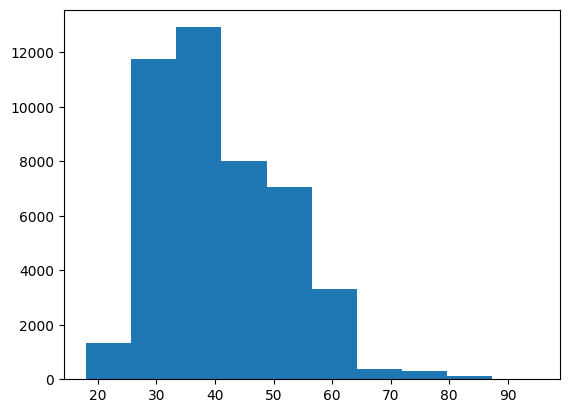

In [100]:
#plot the histogram of age variable.
plt.hist(inp1.age)
plt.show()

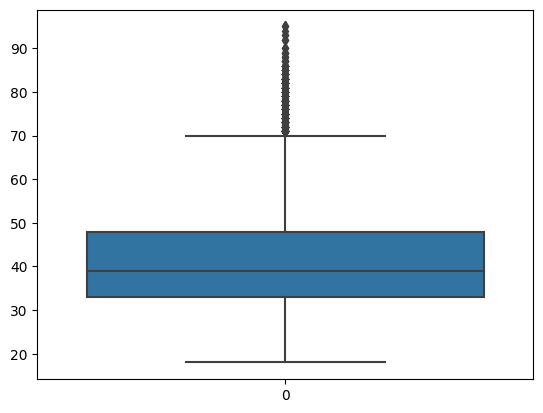

In [108]:
#plot the boxplot of age variable.
sns.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [103]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

<Axes: >

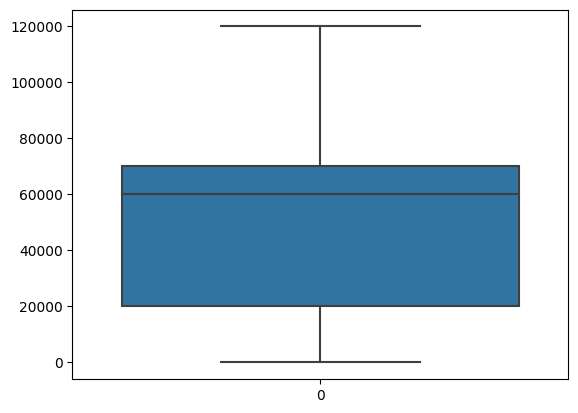

In [104]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)

#### Balance variable 

In [105]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [106]:
inp1.balance.value_counts()

balance
0        3514
1         194
2         156
4         139
3         134
         ... 
4617        1
20584       1
4358        1
5317        1
16353       1
Name: count, Length: 7167, dtype: int64

<Axes: >

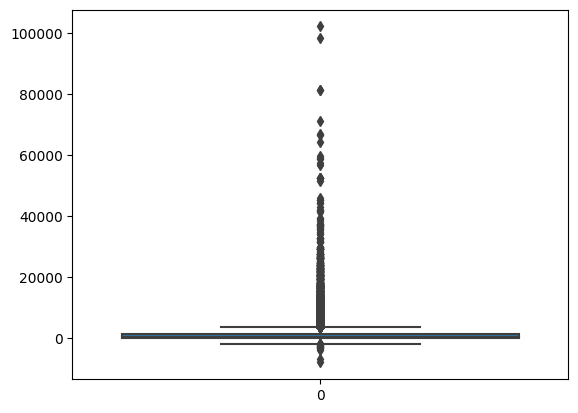

In [107]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)

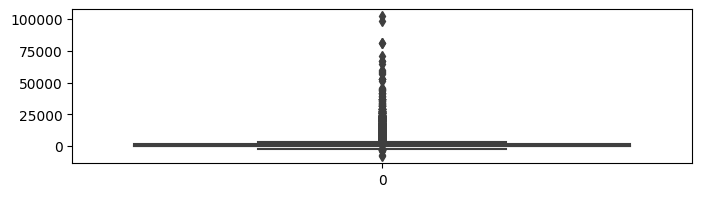

In [110]:
#plot the boxplot of balance variable after scaling in 8:2.
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [112]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable
inp1.balance.quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [113]:
#describe the duration variable of inp1
inp1.duration.describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [114]:
inp1.duration.value_counts()

duration
1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
1.73333333333333 min    127
2.03333333333333 min    127
                       ... 
1500 sec                  1
22.1666666666667 min      1
868 sec                   1
1269 sec                  1
16.2833333333333 min      1
Name: count, Length: 2646, dtype: int64

In [172]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration = inp1.duration.apply( lambda x: float(x.rstrip('sec'))/60 if 'sec' in x.lower() else float(x.rstrip('min')))

In [173]:
#describe the duration variable
inp1.duration.value_counts()

duration
1.500000     184
1.900000     175
1.350000     166
1.850000     166
2.050000     166
            ... 
16.466667      1
11.166667      1
10.916667      1
13.166667      1
16.283333      1
Name: count, Length: 2292, dtype: int64

In [117]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

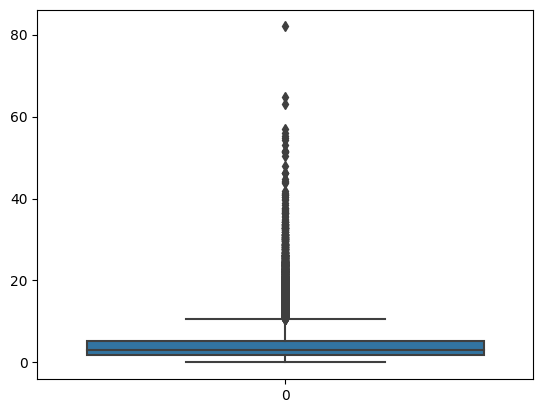

In [118]:
sns.boxplot(inp1.duration)
plt.show()

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [120]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

marital
married     0.601978
single      0.282932
divorced    0.115089
Name: proportion, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

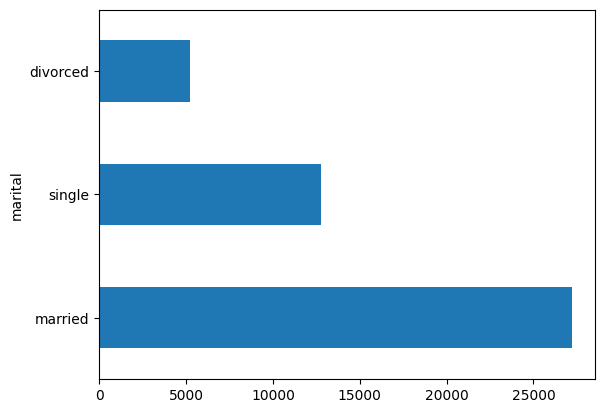

In [121]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts().plot.barh()
plt.show

#### Job  

In [122]:
#calculate the percentage of each job status category.
inp1.job.value_counts(normalize=True)

job
blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: proportion, dtype: float64

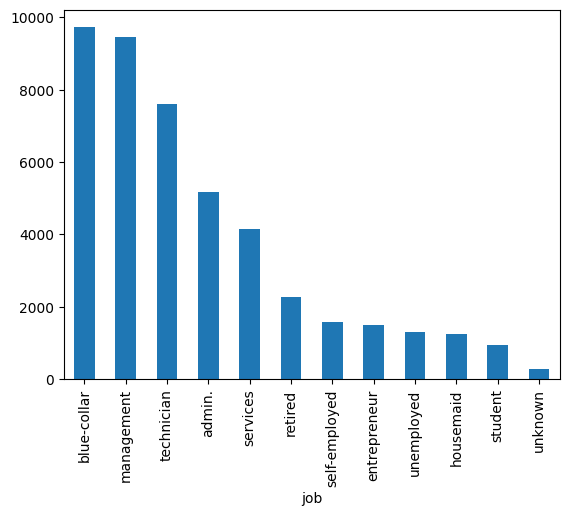

In [124]:
#plot the bar graph of percentage job categories
inp1.job.value_counts().plot.bar()
plt.show()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [174]:
#calculate the percentage of each education category.
inp1.education.value_counts(normalize=True)*100

education
secondary    51.327473
tertiary     29.419189
primary      15.143597
unknown       4.109741
Name: proportion, dtype: float64

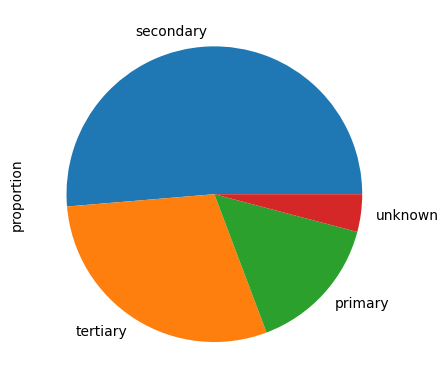

In [175]:
#plot the pie chart of education categories
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome 

In [176]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts(normalize=True)*100

poutcome
unknown    81.751954
failure    10.836784
other       4.072098
success     3.339164
Name: proportion, dtype: float64

#### Response the target variable 

In [178]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)*100
# inp0.columns

response
no     88.297425
yes    11.702575
Name: proportion, dtype: float64

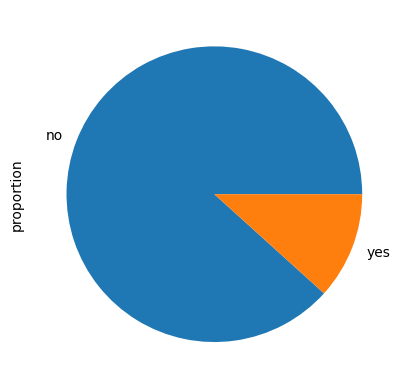

In [179]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

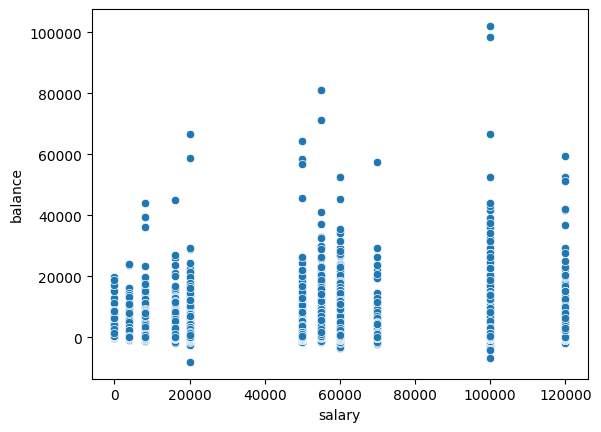

In [181]:
#plot the scatter plot of balance and salary variable in inp1
sns.scatterplot(inp1, x='salary',y='balance')
plt.show()

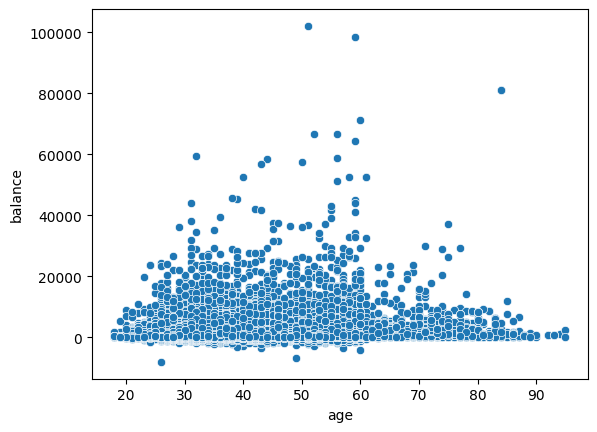

In [182]:
#plot the scatter plot of balance and age variable in inp1
sns.scatterplot(inp1, x='age',y='balance')
plt.show()

In [204]:
inp1.age = inp1.age.astype('int64') #got a type error during pairplot, so changing type from Int64 to int64

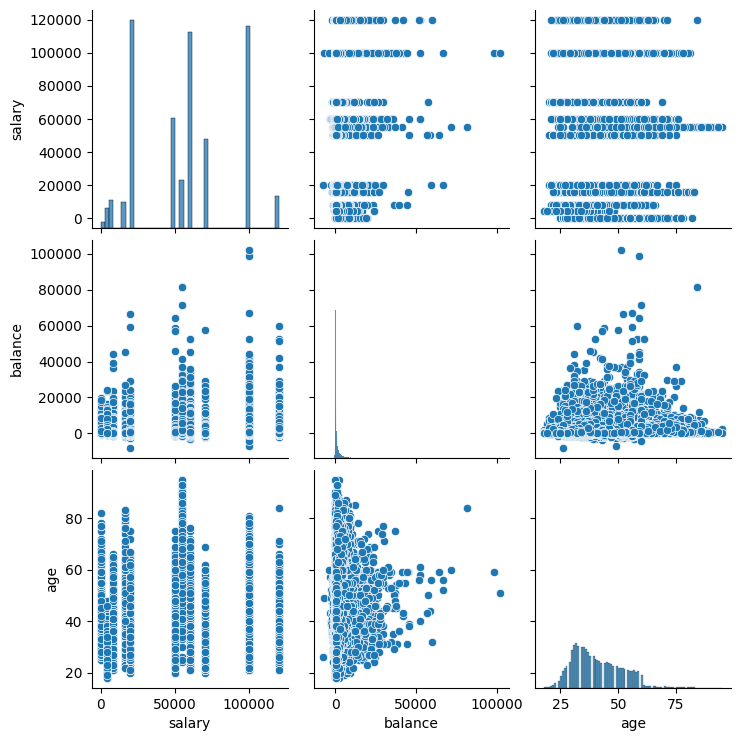

In [207]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(inp1[['salary','balance','age']],kind='scatter')
plt.show()

#### Correlation heat map 

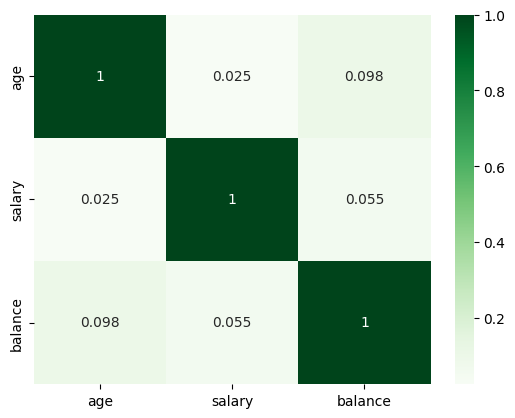

In [210]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[['age','salary','balance']].corr(), cmap='Greens', annot=True)
plt.show()

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [212]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby(by='response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [213]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby(by='response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

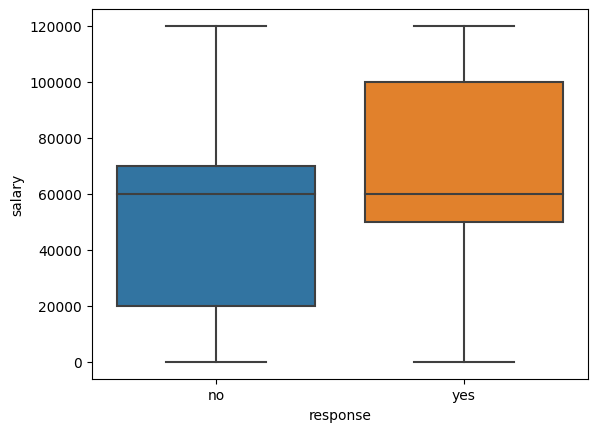

In [215]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1, x='response', y='salary')
plt.show()

#### Balance vs response 

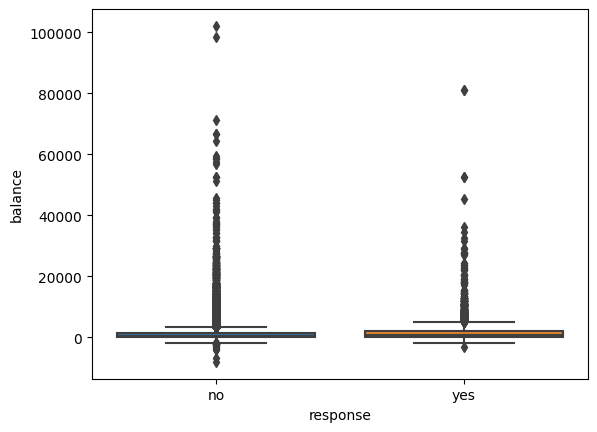

In [216]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1, x='response', y='balance')
plt.show()

In [217]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby(by='response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [218]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby(by='response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [219]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [223]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby(by='response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


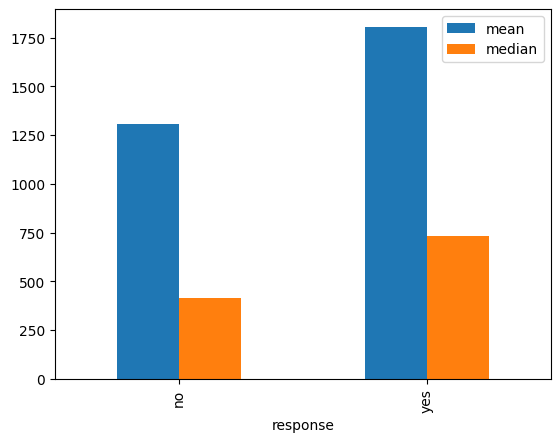

In [226]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby(by='response')['balance'].aggregate(['mean','median']).plot.bar()
plt.show()

#### Education vs salary 

In [227]:
#groupby the education to find the mean of the salary education category.
inp1.groupby(by='education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [228]:
#groupby the education to find the median of the salary for each education category.
inp1.groupby(by='education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

#### Job vs salary

In [230]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby(by='job')['salary'].mean()

job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [232]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag'] = np.where(inp1['response'] == 'yes', 1,0)
inp1['response_flag'].value_counts()

response_flag
0    39876
1     5285
Name: count, dtype: int64

In [234]:
inp1['response'].value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [235]:
inp1['response_flag'].value_counts(normalize=True)

response_flag
0    0.882974
1    0.117026
Name: proportion, dtype: float64

In [236]:
inp1.response_flag.mean()

0.1170257523084077

#### Education vs response rate

In [239]:
#calculate the mean of response_flag with different education categories.
inp1.groupby(by='education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [240]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby(by='marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

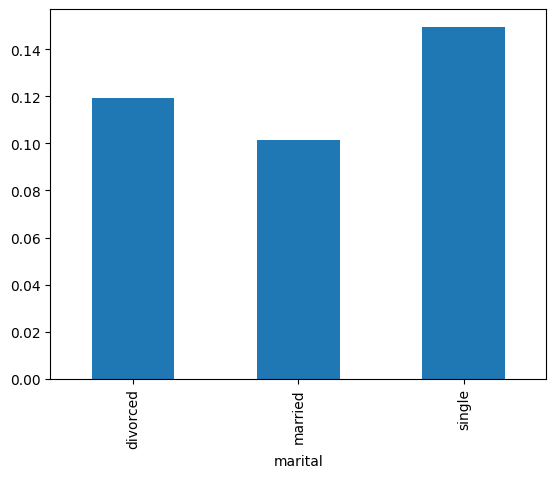

In [242]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby(by='marital')['response_flag'].mean().plot.bar()
plt.show()

#### Loans vs response rate 

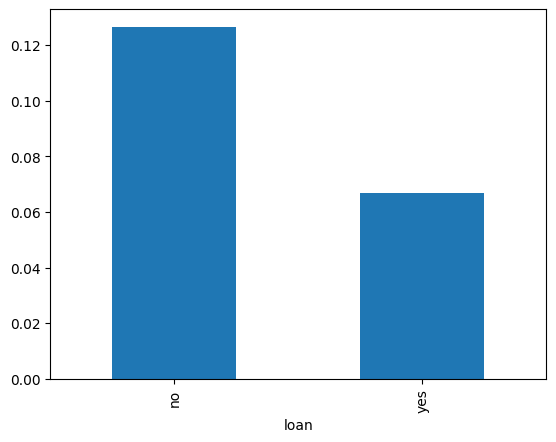

In [243]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby(by='loan')['response_flag'].mean().plot.bar()
plt.show()

#### Housing loans vs response rate 

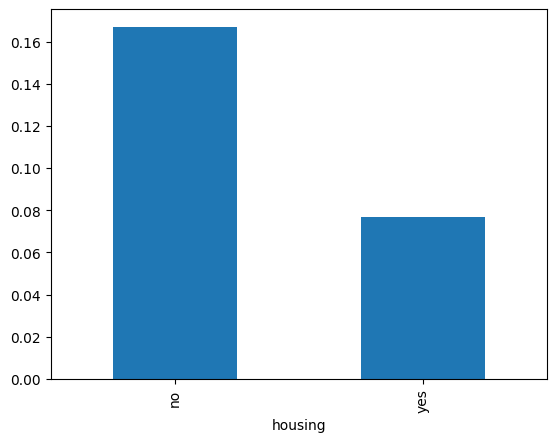

In [245]:
#plot the bar graph of housing loan status with average value of response_flag
inp1.groupby(by='housing')['response_flag'].mean().plot.bar()
plt.show()

#### Age vs response 

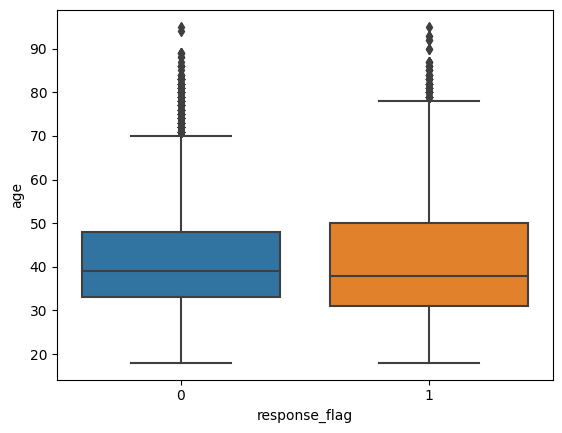

In [257]:
#plot the boxplot of age with response_flag
sns.boxplot(data=inp1, x='response_flag', y='age')
plt.show()

##### making buckets from age columns 

In [266]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
inp1['age_group'] = pd.cut(inp1.age,[0,30,40,50,60,9999], labels = ['<30','30-40','40-50','50-60','60+'])
inp1.age_group.head()

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age_group, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [267]:
inp1.age_group.value_counts(normalize=True)*100

age_group
30-40    39.108966
40-50    24.868803
50-60    17.840615
<30      15.555457
60+       2.626160
Name: proportion, dtype: float64

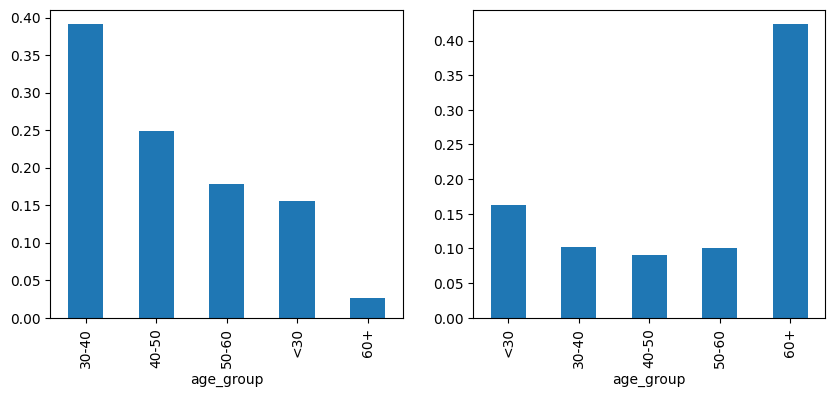

In [275]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(by='age_group')['response_flag'].mean().plot.bar()
plt.show()

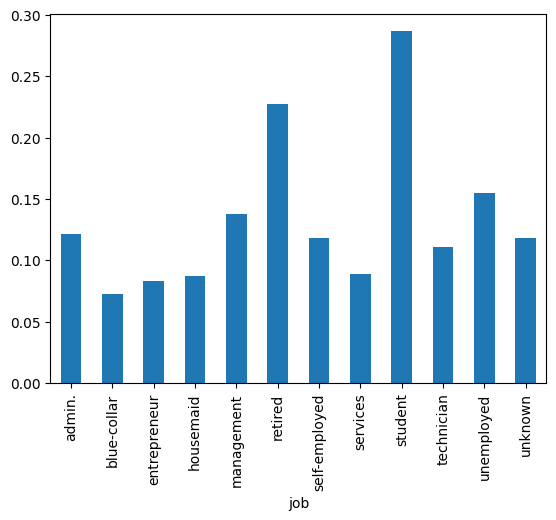

In [276]:
#plot the bar graph of job categories with response_flag mean value.
inp1.groupby(by='job')['response_flag'].mean().plot.bar()
plt.show()

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

<Axes: xlabel='marital', ylabel='education'>

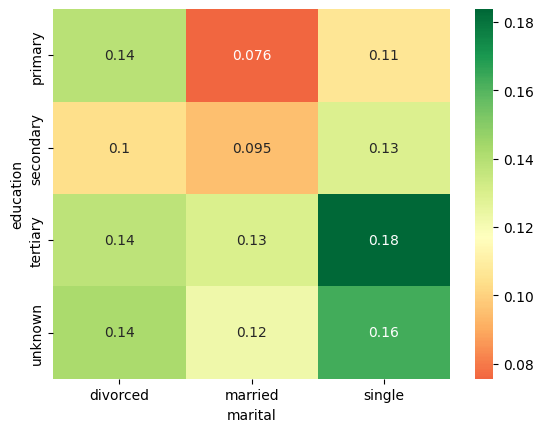

In [284]:
#create heat map of education vs marital vs response_flag
grid1 = pd.pivot_table(data=inp1, index='education', columns='marital', values='response_flag')
sns.heatmap(grid1, annot=True, cmap='RdYlGn', center=.117)

#### Job vs marital vs response 

<Axes: xlabel='marital', ylabel='job'>

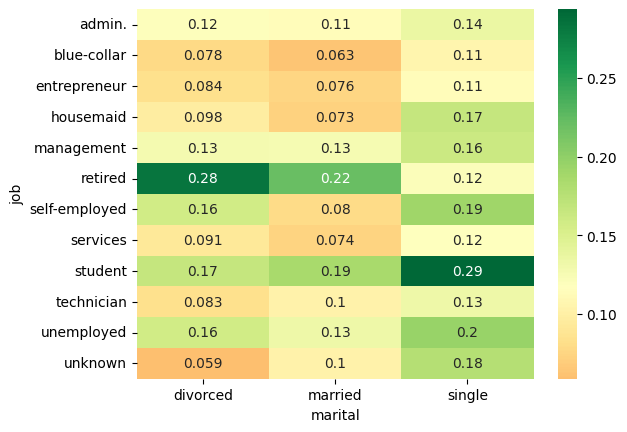

In [286]:
#create the heat map of Job vs marital vs response_flag.
grid2 = pd.pivot_table(data=inp1, index='job', columns='marital', values='response_flag')
sns.heatmap(grid2, annot=True, cmap='RdYlGn', center=.117)

#### Education vs poutcome vs response

<Axes: xlabel='poutcome', ylabel='education'>

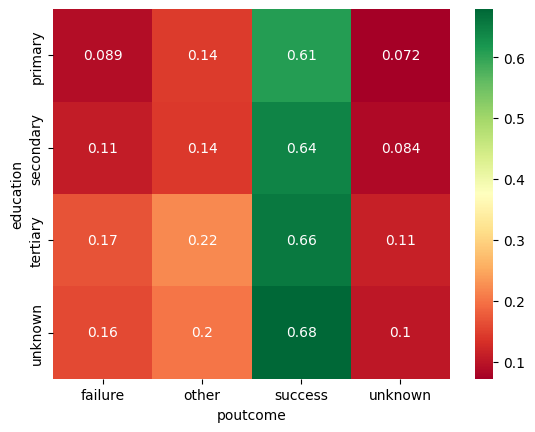

In [287]:
#create the heat map of education vs poutcome vs response_flag.
grid2 = pd.pivot_table(data=inp1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(grid2, annot=True, cmap='RdYlGn')

In [289]:
#to get the center value find the mean
inp1[inp1.pdays >0].response_flag.mean()

0.2307785593014795

<Axes: xlabel='poutcome', ylabel='education'>

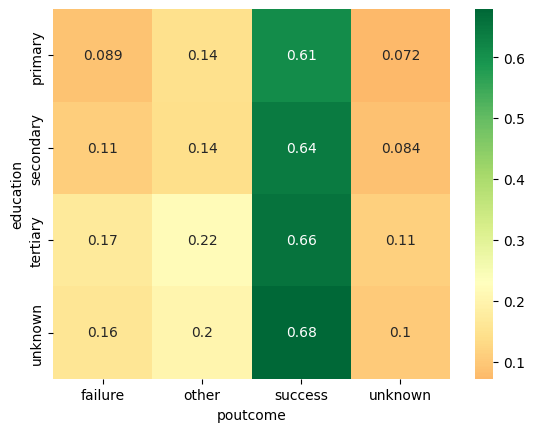

In [290]:
grid2 = pd.pivot_table(data=inp1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(grid2, annot=True, cmap='RdYlGn', center=.23)